In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
data= fetch_california_housing()
print(data.data.shape, data.target.shape)

(20640, 8) (20640,)


In [ ]:
x= data.data
y= data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=25, hidden_layer2=30, output_features=1):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
model=Model()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
losses = []

epoch:  1/1000  loss: 7561.10253906
epoch:  2/1000  loss: 473.27615356
epoch:  3/1000  loss: 1172.93945312
epoch:  4/1000  loss: 2196.85034180
epoch:  5/1000  loss: 1856.57714844
epoch:  6/1000  loss: 1000.14459229
epoch:  7/1000  loss: 318.79772949
epoch:  8/1000  loss: 33.99219894
epoch:  9/1000  loss: 46.76702499
epoch: 10/1000  loss: 197.42855835
epoch: 11/1000  loss: 344.96911621
epoch: 12/1000  loss: 375.60668945
epoch: 13/1000  loss: 248.80726624
epoch: 14/1000  loss: 91.21070862
epoch: 15/1000  loss: 4.07725334
epoch: 16/1000  loss: 47.71871948
epoch: 17/1000  loss: 122.73715973
epoch: 18/1000  loss: 135.47895813
epoch: 19/1000  loss: 95.29598236
epoch: 20/1000  loss: 42.29460526
epoch: 21/1000  loss: 8.68775463
epoch: 22/1000  loss: 5.77735472
epoch: 23/1000  loss: 24.26725960
epoch: 24/1000  loss: 45.79240417
epoch: 25/1000  loss: 55.94239426
epoch: 26/1000  loss: 50.42012024
epoch: 27/1000  loss: 34.03544235
epoch: 28/1000  loss: 16.07634544
epoch: 29/1000  loss: 4.93759823


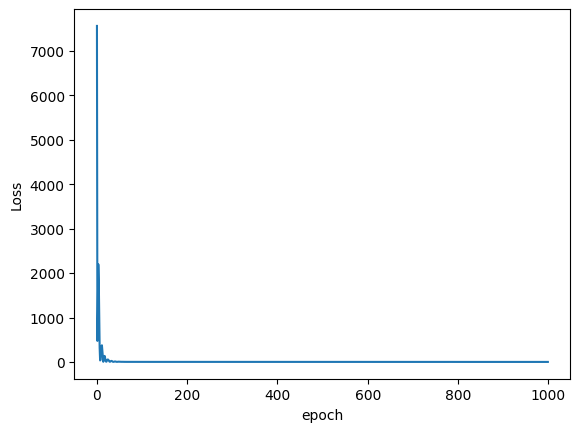

In [ ]:
for i in range(epochs):

    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train.view(-1,1))


    losses.append(loss.detach())
    print(f'epoch: {i+1:2}/{epochs}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())